In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset1 = pd.read_csv('span_feb_28.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=10.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=10.0)]
print(data_neg.shape)
print(data_pos.shape)

(21820, 100)
(5993, 100)


In [3]:
dataset = pd.read_csv('span_feb_28.csv',delimiter = ',')
dataset = dataset.loc[dataset['proj_span'] >= 10.0]


In [4]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(27813, 100)

In [5]:

dataset.describe()

,activity_intensity,activity_intensity_Q1,activity_intensity_Q2,activity_intensity_Q3,activity_intensity_Q4,class,contribution_30_10_percentage,contribution_50_30_percentage,contribution_below_10_percentage,contribution_over_50,...,num_TeamAdd_Q4,num_Watch,num_Watch_Q1,num_Watch_Q2,num_Watch_Q3,num_Watch_Q4,num_joint_project,num_joint_success_project,proj_span,team_age_in_days
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,...,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,0.338187,0.393658,0.332373,0.332155,0.302854,0.215475,0.039833,0.061942,0.030057,0.858987,...,0.007622,0.829936,0.761011,0.699924,0.737065,0.743429,828.326358,814.016647,186.270845,53.731277
std,1.765379,1.994095,1.838033,1.541264,1.844249,0.411159,0.123407,0.204760,0.103510,0.348041,...,0.098599,8.089224,7.275324,6.542039,7.217557,7.237156,2738.267131,2731.359397,256.520035,141.433467
min,0.001468,0.001468,0.001468,0.001468,0.001468,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000
25%,0.043831,0.043956,0.043478,0.043636,0.039474,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000,0.000000
50%,0.126761,0.129032,0.125000,0.125000,0.115385,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,84.000000,0.000000
75%,0.335347,0.354839,0.333333,0.333333,0.285714,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,237.000000,35.000000
max,267.739130,249.800000,276.166667,224.333333,283.666667,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,607.000000,607.000000,607.000000,607.000000,607.000000,10064.000000,10033.000000,1800.000000,1718.000000


In [6]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20190101)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  16687
validation size:  5563
test size:  5563


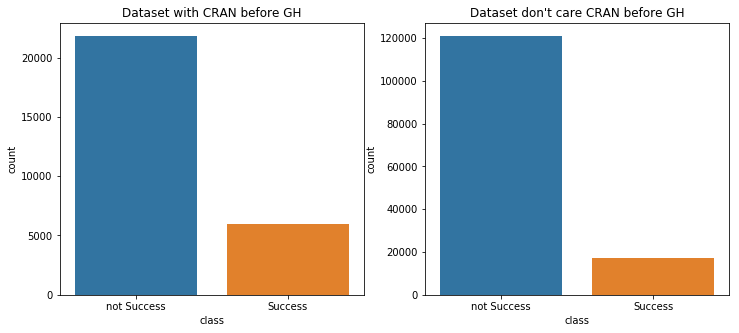

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.86079
Precision on train: 0.84152
Recall on train: 0.42515

Classification accuracy of the LogisticRegression classifier on val set: 0.86284
Precision on val: 0.84013
Recall on val: 0.43644


array([[3834,  463],
       [1116,  150]])

In [9]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.03370514e-01 -1.22186047e-01 -1.03169203e-01 -1.00737809e-01
  -9.85234268e-02 -1.18374944e-02 -2.22985708e-02 -2.76129669e-03
  -2.62127292e-01 -1.19755104e-01 -1.19755104e-01 -1.52495701e-01
  -2.63191001e-01  4.33484346e-07  4.99950355e-03  5.71838927e-03
   6.67968101e-04  6.60199674e-03  4.71760849e-03  1.17581909e-02
   9.57278258e-03  6.39881623e-03  6.30796057e-03  1.37640595e-03
   2.39742240e-02  2.54262544e-02  2.33778634e-02  1.96577367e-02
   1.83586229e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.83400170e-03 -1.25027217e-02
  -1.40860828e-02 -1.70819202e-02 -1.19197262e-02  2.17675308e-04
   2.14910781e-03 -2.25749553e-02 -1.65139331e-03  2.50964045e-03
   2.64701966e-02  4.00924386e-02 -2.36676297e-02 -1.36147155e-02
  -5.26488606e-03  6.46270612e-03  3.93448523e-02  7.19645539e-03
  -1.22614786e-02 -3.96126059e-03 -1.25854447e-02 -1.10888613e-02
  -1.14536348e-02 -1.14149469e-02 -1.09494937e-02 -7.65304707e-03
  -7.44774

In [10]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [12]:
# lr = LogisticRegression(solver='lbfgs')
# lr.fit(X_tr, y_tr)
# predictions = lr.predict(X_tr)
# params = np.append(lr.intercept_, lr.coef_)
# newX = pd.DataFrame({"Constant":np.ones(len(X_tr))}).join(pd.DataFrame(X_tr.reset_index(drop=True)))
# MSE = (sum((y_tr-predictions)**2))/(len(newX)-len(newX.columns))


# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b
# print(newX)
# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

In [13]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [7]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)



In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.87331
Precision on train: 0.89651
Recall on train: 0.45672

Classification accuracy of the LogisticRegression classifier on val set: 0.86302
Precision on val: 0.87321
Recall on val: 0.41441


In [9]:
# display coef for logistic regression model
# print(lr.coef_)
# print(lr.intercept_)

In [10]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [22]:
c = np.logspace(-5, 2, num=40, base=10)
score_array = np.zeros((40,))
for n in range(len(c)):
    lr = LogisticRegression(C=c[n], solver='lbfgs')
    lr.fit(X_tr, y_tr)
    score_array[n] = lr.score(X_val, y_val)
    
print(score_array)

[0.78842351 0.78896279 0.79129966 0.79381629 0.7999281  0.82922883
 0.86068668 0.8610462  0.86194499 0.86122596 0.86140572 0.86158548
 0.86086644 0.86140572 0.86248427 0.86320331 0.86338307 0.8641021
 0.86392234 0.86374258 0.86338307 0.86338307 0.86320331 0.86320331
 0.86320331 0.86302355 0.86338307 0.86302355 0.86338307 0.86302355
 0.86302355 0.86302355 0.86320331 0.86320331 0.86338307 0.86374258
 0.86338307 0.86356283 0.86338307 0.86338307]


In [23]:
c

array([1.00000000e-05, 1.51177507e-05, 2.28546386e-05, 3.45510729e-05,
       5.22334507e-05, 7.89652287e-05, 1.19377664e-04, 1.80472177e-04,
       2.72833338e-04, 4.12462638e-04, 6.23550734e-04, 9.42668455e-04,
       1.42510267e-03, 2.15443469e-03, 3.25702066e-03, 4.92388263e-03,
       7.44380301e-03, 1.12533558e-02, 1.70125428e-02, 2.57191381e-02,
       3.88815518e-02, 5.87801607e-02, 8.88623816e-02, 1.34339933e-01,
       2.03091762e-01, 3.07029063e-01, 4.64158883e-01, 7.01703829e-01,
       1.06081836e+00, 1.60371874e+00, 2.42446202e+00, 3.66524124e+00,
       5.54102033e+00, 8.37677640e+00, 1.26638017e+01, 1.91448198e+01,
       2.89426612e+01, 4.37547938e+01, 6.61474064e+01, 1.00000000e+02])

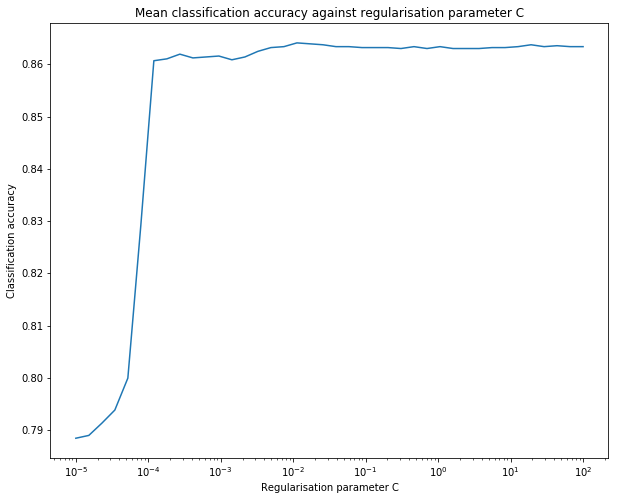

In [24]:
plt.figure(figsize=(10,8))
plt.semilogx(c, score_array, basex=10)
plt.xlabel('Regularisation parameter C')
plt.ylabel('Classification accuracy')
plt.title('Mean classification accuracy against regularisation parameter C')
plt.show()

In [25]:
C_optimal = c[score_array.argmax()]
print('Optimal C is : {:.5f}'.format(C_optimal))
lr = LogisticRegression(C=C_optimal, solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Optimal C is : 0.01125

Classification accuracy of the LogisticRegression classifier on val set: 0.86410
Precision on val: 0.88129
Recall on val: 0.41525


In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9998801462216096
Precision on train: 1.00000
Recall on train: 0.99944

Accuracy score on the val dataset: 0.96261
Precision on val: 0.95763
Recall on val: 0.86186


In [13]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [14]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_joint_success_project
2. num_joint_project
3. team_age_in_days
4. activity_intensity_Q4
5. normalized_proj_span
6. proj_span
7. activity_intensity
8. activity_intensity_Q1
9. activity_intensity_Q2
10. activity_intensity_Q3


In [15]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [16]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [17]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.88087
Radial Basis Function SVC classification accuracy on val set: 0.86230


In [25]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Precision on train: 0.98828
Recall on train: 0.42797
Precision on val: 0.97021
Recall on val: 0.38644


In [29]:
# tune SVM rbf
C = np.logspace(-2, 1, 4)
gamma = np.logspace(-4, -1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)

[[0.78788424 0.79759123 0.85727126 0.84594643]
 [0.79974834 0.85924861 0.85924861 0.85834981]
 [0.85942837 0.8601474  0.86248427 0.86230451]
 [0.8601474  0.86140572 0.86176523 0.85763077]]


In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


MLP classification accuracy on training set: 0.88116
Precision on train: 0.89898
Recall on train: 0.49676

MLP classification accuracy on validation set: 0.86410
Precision on val: 0.87324
Recall on val: 0.42034


In [27]:
hidden_dim = np.array([10,50,100,150,200])

n_layer = np.array([2,5,10])


score_array = np.zeros((5,3))
for h in range(len(hidden_dim)):
    for n in range(len(n_layer)):
        h_l_z = np.repeat(hidden_dim[h], n_layer[n])
        mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=h_l_z, random_state=201902)
        mlp.fit(X_tr, y_tr)
        score_array[h][n] = mlp.score(X_val, y_val)

    
print(score_array)

[[0.86823656 0.8680568  0.86733777]
 [0.85834981 0.85205824 0.85852957]
 [0.85403559 0.84954161 0.85924861]
 [0.85205824 0.84109294 0.8561927 ]
 [0.84972137 0.84900234 0.85097969]]


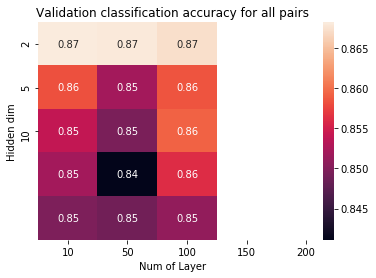

In [28]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=hidden_dim, yticklabels=n_layer)
plt.ylabel('Hidden dim')
plt.xlabel('Num of Layer')
plt.title('Validation classification accuracy for all pairs')
plt.show()